<a href="https://colab.research.google.com/github/marycarmenvv/Modulo2_AnalisisYReporte_A00828570/blob/main/Modulo2_AnalisisYReporte_A00828570.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Momento de Retroalimentación: Módulo 2 Análisis y Reporte sobre el desempeño del modelo. (Portafolio Análisis)**
# María del Carmen Vargas Villarreal A00828570


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn import tree
from sklearn import preprocessing
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt

In [2]:
import pandas as pd # importar libreria

columns = ["Classification", "Alcohol","Malic acid","Ash","Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols"
 	,"Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Copia de wine.data', names= columns).reset_index()
df1 = df1.drop(['index'], axis=1) # abrir el archivo de datos con los nombres dados para las columnas
df1.head() 

,Classification,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# 1. Separación y evaluación del modelo con un conjunto de prueba y un conjunto de validación (Train/Test/Validation).

In [3]:
df1['Classification']

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Classification, Length: 178, dtype: int64

In [4]:
df1.Classification.unique()


array([1, 2, 3])

In [5]:
df_x = df1.drop(["Classification"], axis=1)
df_y = df1["Classification"]

df_x

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
df_y
#df_y.values.tolist()

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Classification, Length: 178, dtype: int64

In [7]:
df_y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Classification, Length: 178, dtype: int64

Separamos en train, test y validation set

In [8]:
train_ratio = 0.80
test_ratio = 0.10
validation_ratio = 0.10


X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=test_ratio)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=validation_ratio/(train_ratio+test_ratio))

print("X_train : ",X_train.shape)

print("X_test : ",X_test.shape)

print("X_valid : ",X_valid.shape) # Usar test de validación para hacer las pruebas necesarias 
# para mejorar el modelo. Hasta el final, se usa el set de prueba. 



X_train :  (142, 13)
X_test :  (18, 13)
X_valid :  (18, 13)


In [18]:
classifier = tree.DecisionTreeClassifier(criterion='gini')

# Train Decision Tree Classifer

classifier = classifier.fit(X_train, y_train)
classifier.score(X_train, y_train)

1.0

In [20]:
test_pred_decision_tree = classifier.predict(X_valid)

In [11]:
test_pred_decision_tree_list = test_pred_decision_tree.tolist()

In [12]:
for i in range(len(test_pred_decision_tree)):
  print('Real: ',test_pred_decision_tree_list[i],' | Pred: ', test_pred_decision_tree_list[i])

Real:  2  | Pred:  2
Real:  2  | Pred:  2
Real:  1  | Pred:  1
Real:  1  | Pred:  1
Real:  3  | Pred:  3
Real:  2  | Pred:  2
Real:  2  | Pred:  2
Real:  3  | Pred:  3
Real:  3  | Pred:  3
Real:  1  | Pred:  1
Real:  2  | Pred:  2
Real:  2  | Pred:  2
Real:  2  | Pred:  2
Real:  1  | Pred:  1
Real:  2  | Pred:  2
Real:  2  | Pred:  2
Real:  2  | Pred:  2
Real:  3  | Pred:  3


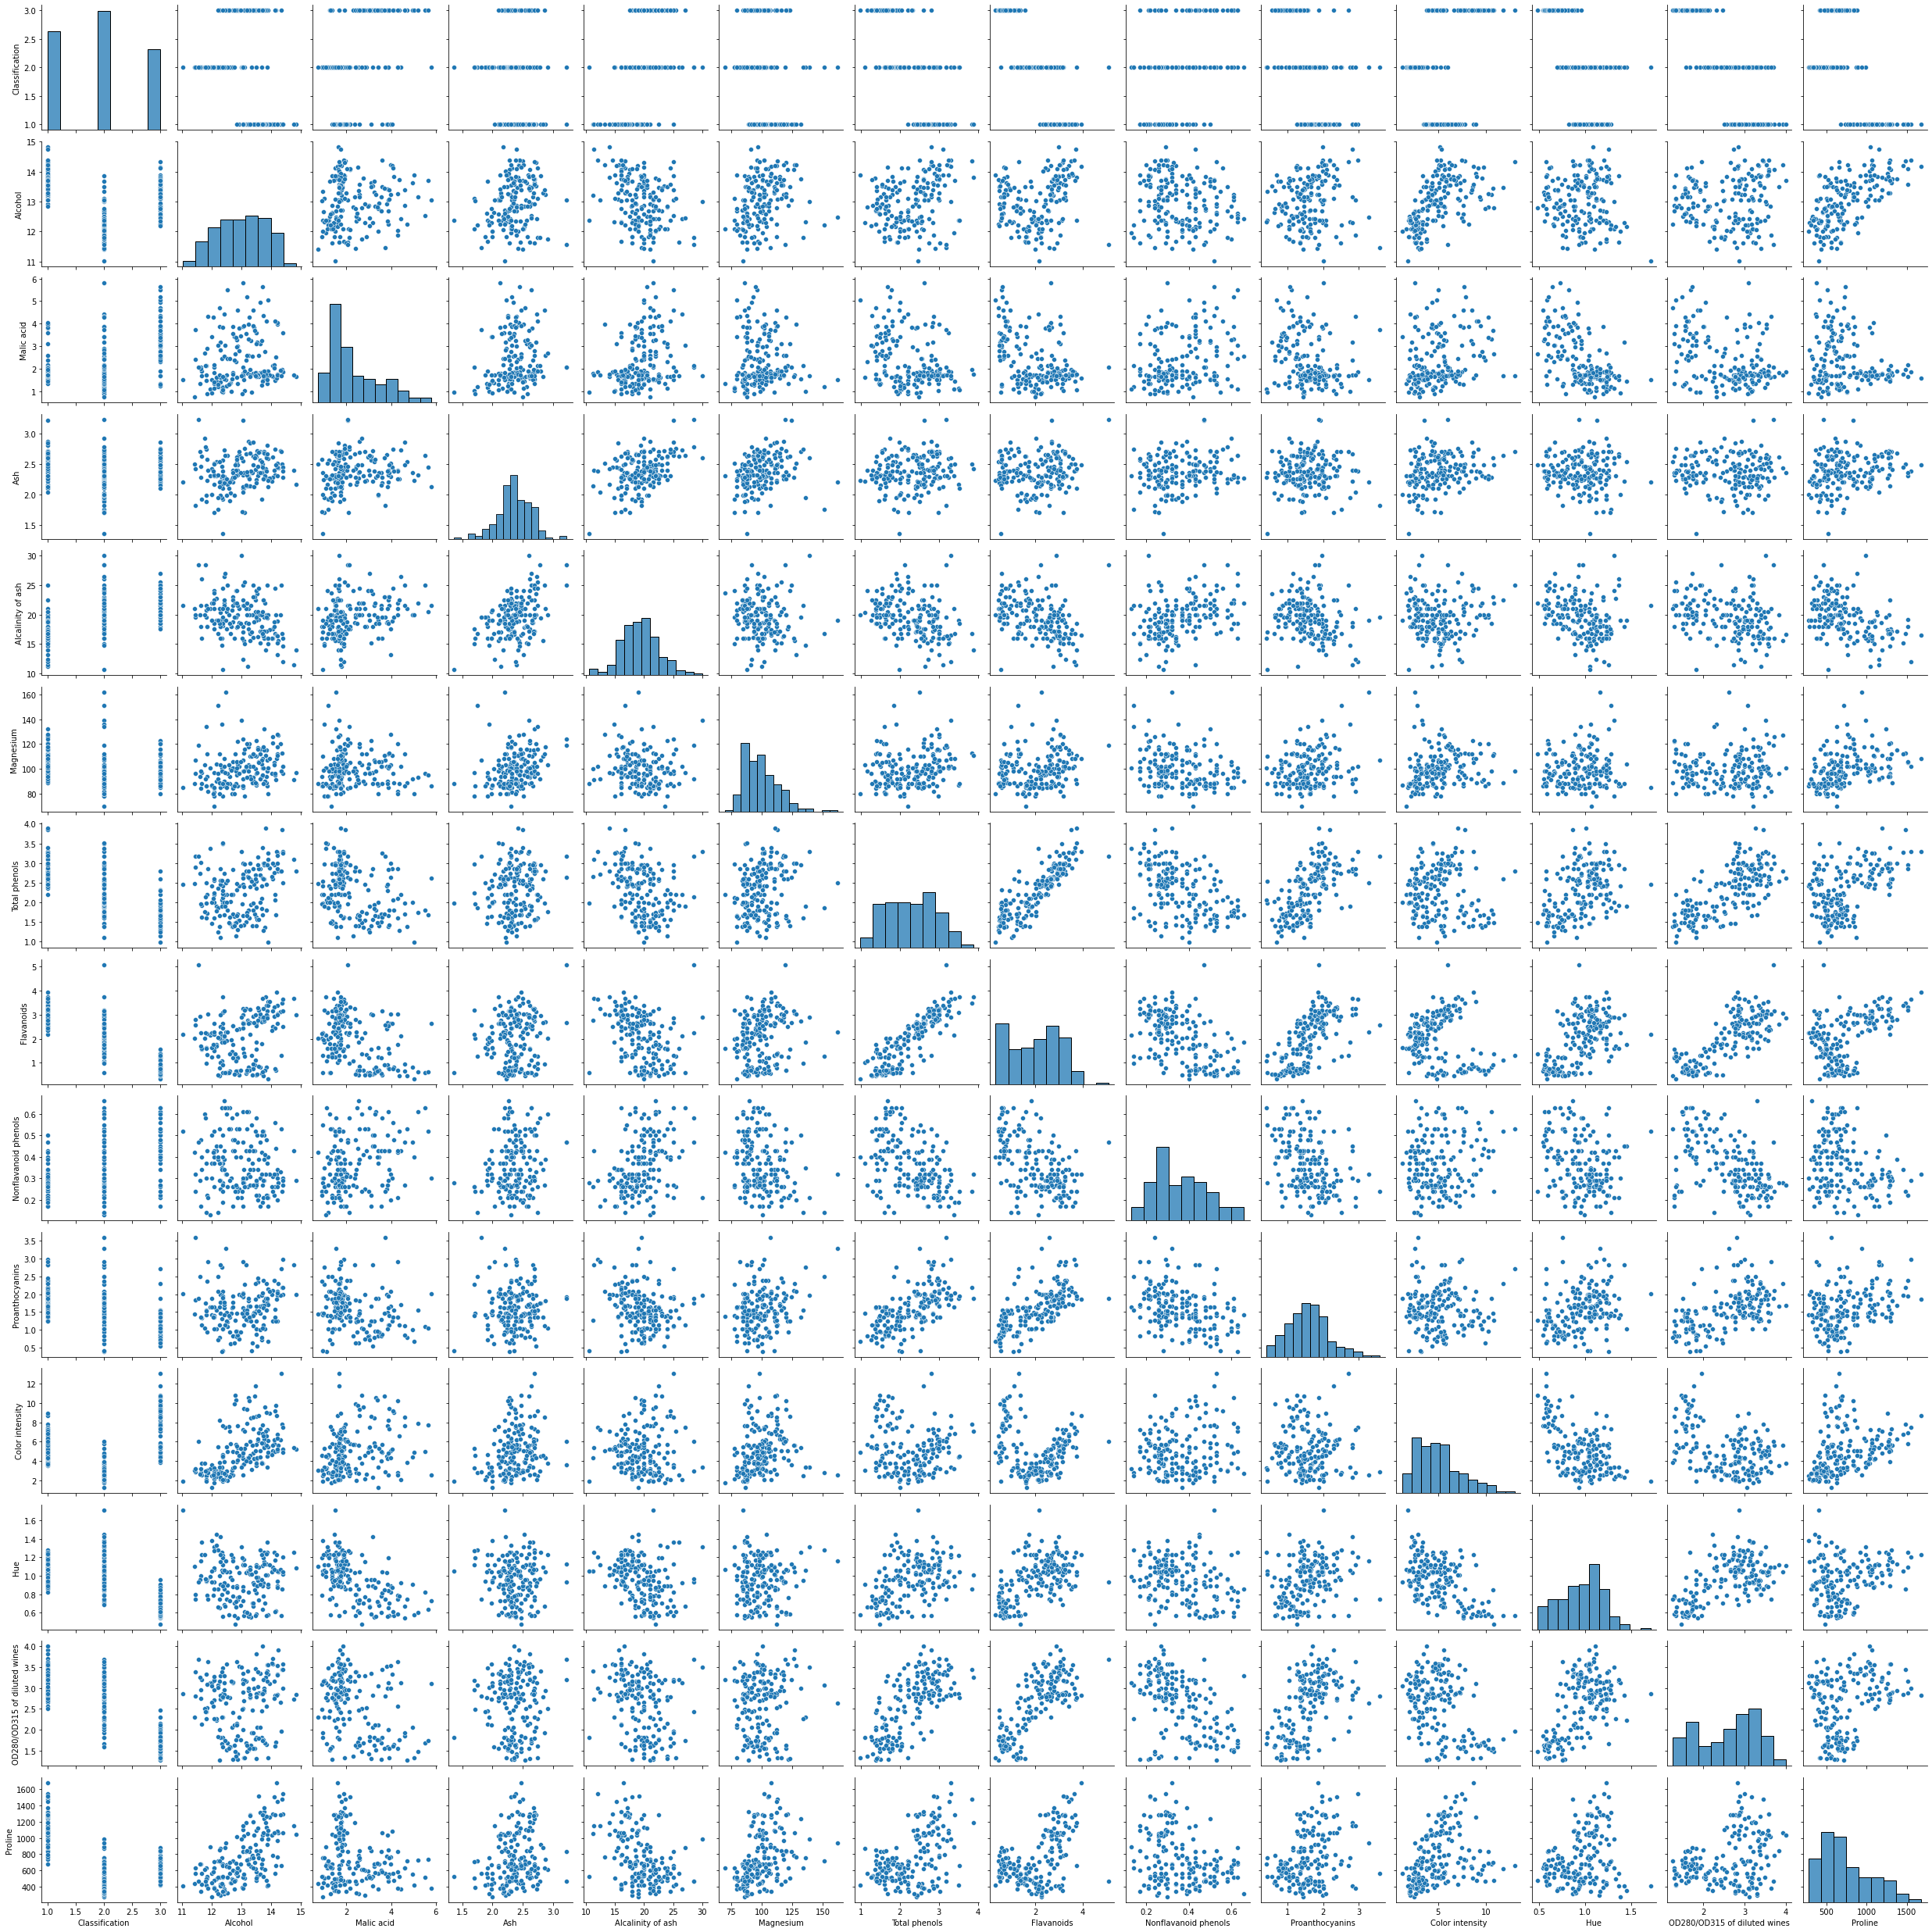

In [13]:
sns.pairplot(df1)

**To increase the accuracy of Prediction, we need to
have Low Variance and Low Bias model. But, we cannot achieve this due to the following:**




**Decreasing the Variance will increase the Bias
Decreasing the Bias will increase the Variance**

# 2. Diagnóstico y explicación el grado de bias o sesgo: Bajo, medio o alto


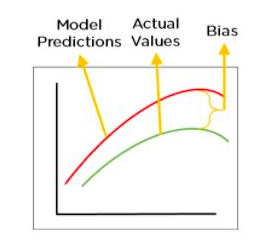

Bias o sesgo es la diferencia entre la predicción promedio de nuestro modelo y el valor correcto que estamos tratando de predecir.\
El modelo con alto sesgo presta muy poca atención a los datos de entrenamiento y simplifica demasiado el modelo. Siempre conduce a un alto error en los datos de entrenamiento y prueba.
Fuente: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

When the Bias is high, assumptions made by our model are too basic, the model can’t capture the important features of our data. This means that our model hasn’t captured patterns in the training data and hence cannot perform well on the testing data too. If this is the case, our model cannot perform on new data and cannot be sent into production. 

This instance, where the model cannot find patterns in our training set and hence fails for both seen and unseen data, is called Underfitting. 
Fuente: https://www.simplilearn.com/tutorials/machine-learning-tutorial/bias-and-variance

High Bias can be identified when we have:

High training error (higher than acceptable test error)
Test error is almost same as training error



https://medium.com/analytics-vidhya/difference-between-bias-and-variance-in-machine-learning-fec71880c757

High Bias is due to a simple model. Consider the following to reduce High Bias:

Use more complex model (Ex: add polynomial features)
Increase input features
Decrease Regularization term


In [17]:
SSE = np.mean((np.mean(test_pred_decision_tree) - df_y)**2)
SSE

0.601123595505618

# 3. Diagnóstico y explicación el grado de varianza: Bajo, medio o alto

La varianza es la variabilidad de la predicción del modelo para un punto de datos dado o un valor que nos indica la dispersión de nuestros datos. El modelo con alta varianza presta mucha atención a los datos de entrenamiento y no generaliza sobre los datos que no ha visto antes. Como resultado, estos modelos funcionan muy bien con los datos de entrenamiento, pero tienen altas tasas de error con los datos de prueba. 
Fuente: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

High Variance can be identified when we have:

Low training error (lower than acceptable test error)
High test error (higher than acceptable test error)


https://medium.com/analytics-vidhya/difference-between-bias-and-variance-in-machine-learning-fec71880c757

How to address High Variance or High Bias?
High Variance is due to a model that tries to fit most of the training dataset points making it complex. Consider the following to reduce High Variance:

Reduce input features(because you are overfitting)
Use less complex model
Include more training data
Increase Regularization term

In [15]:
varianza_tree = np.var(test_pred_decision_tree)
varianza_tree

0.4444444444444444

# 4. Diagnóstico y explicación el nivel de ajuste del modelo: Underfitt, fitt, overfitt


En el aprendizaje supervisado, el **underfitting** ocurre cuando un modelo no puede capturar el patrón de los datos. Estos modelos suelen tener un **alto sesgo y una baja varianza**. **Ocurre cuando tenemos muy poca cantidad de datos** para construir un modelo preciso o cuando intentamos construir un modelo lineal con datos no lineales.

El **overfitting** ocurre cuando nuestro modelo captura el ruido junto con el patrón en los datos. **Ocurre cuando entrenamos mucho nuestro modelo sobre un conjunto de datos ruidoso.** Estos modelos tienen un **sesgo bajo y una varianza alta**.

Estos modelos son muy complejos, como los *árboles de decisión*, que tienden a **sobreajustarse**.

Si nuestro modelo es demasiado simple y tiene muy pocos parámetros, entonces puede tener un alto sesgo y una baja varianza. Por otro lado, si nuestro modelo tiene una gran cantidad de parámetros, tendrá una varianza alta y un sesgo bajo. Por lo tanto, **debemos encontrar el equilibrio correcto/bueno sin sobreajustar o desadaptar los datos.**

In [2]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install bias_variance_decomp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement bias_variance_decomp (from versions: none)
ERROR: No matching distribution found for bias_variance_decomp


In [3]:
from mlxtend.evaluate import bias_variance_decomp


ImportError: ignored

# Error total del modelo

Irreducible Error is the error that cannot be reduced irrespective of the models. It is a measure of the amount of noise in our data due to unknown variables. This error cannot be removed.


Error = Reducible Error + Irreducible Error

Reducible Error is the sum of squared Bias and Variance.



Reducible Error = Bias² + Variance

Error in a Machine Learning model is the sum of Reducible and Irreducible errors.



Combining the above two equations, we get
Error = Bias² + Variance + Irreducible Error